<a href="https://colab.research.google.com/github/Younesmoussaoui/chekpoints_SIC/blob/main/chekpoint_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import seaborn as sns

kc = pd.read_csv('/content/sample_data/kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print(kc.columns)
kc.info()
kc.isnull().sum()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          216

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
kc['date'] = pd.to_datetime(kc['date'])
kc.head()
kc['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

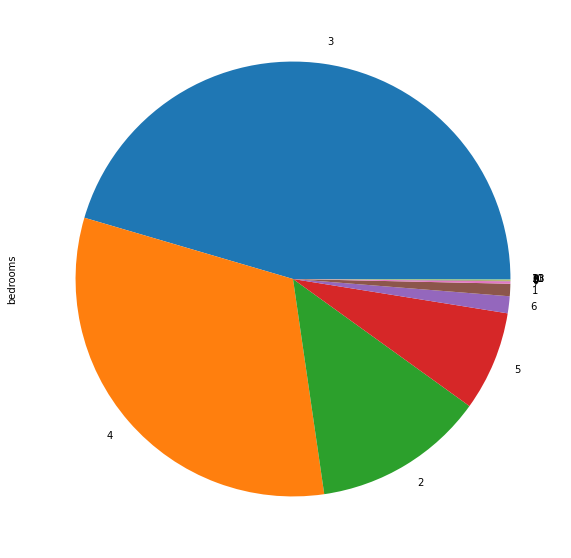

In [ ]:

p = kc['bedrooms'].value_counts()
p.plot.pie(figsize=(15,10))

# Interpritation : 
* Il existe plus  de 10 styles des maisons ( d'apres nombres des chambres )
* Les maisons qui ont a vendre les plus sont qui ont   3 , 4 et 2 chambres 

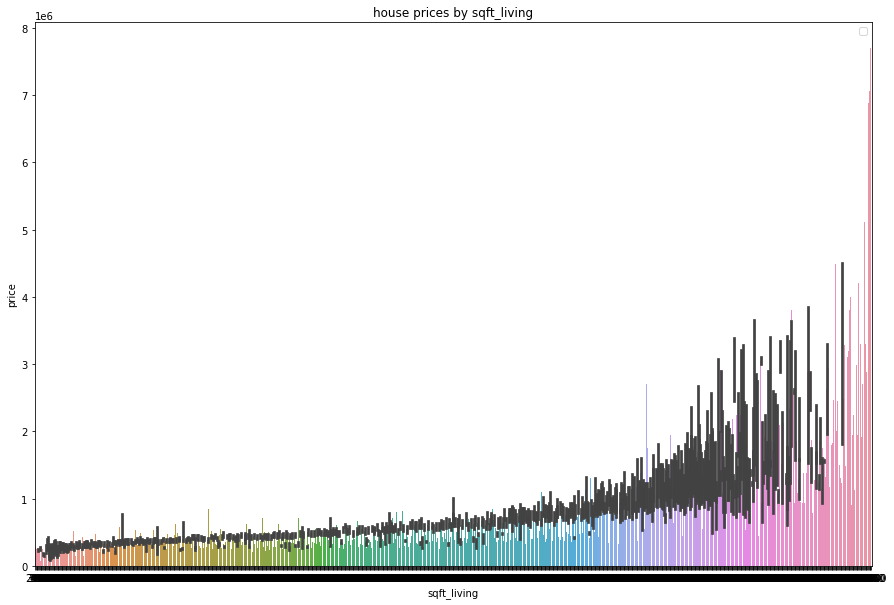

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living")
plt.xlabel('sqft_livig')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_living',y='price',data=kc)

# Interpretation
* Il existe un grand nombre defferents des tailles des maisons . 
* Il existe une correlation directe entre ''price'' & ''sqft_living''

0    21450
1      163
Name: waterfront, dtype: int64

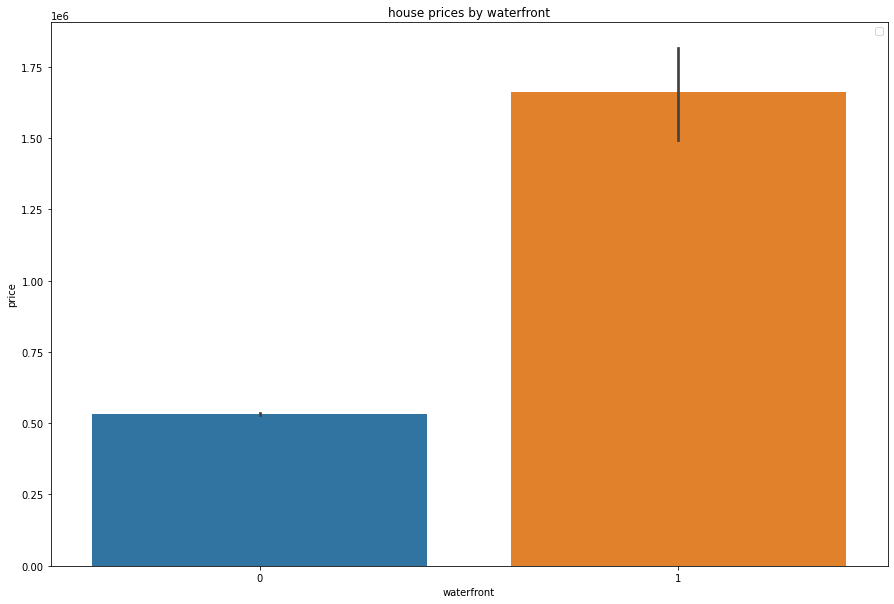

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by waterfront")
plt.xlabel('waterfront')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='waterfront',y='price',data=kc)
kc['waterfront'].value_counts()

# Interpretation
* 99% des maisons sont au bord de la mer .
* Les maisons qui sont au bord de la mer sont les plus cher . 

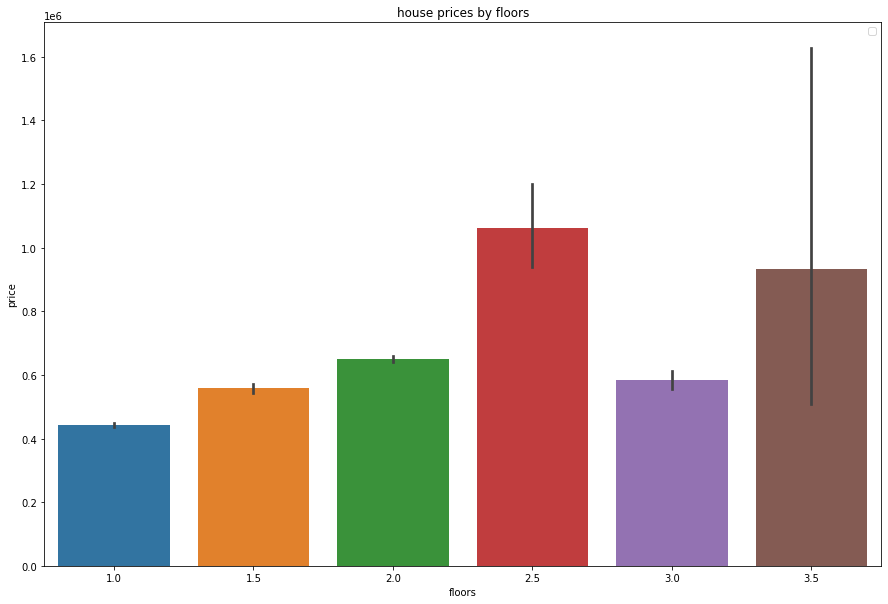

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by floors")
plt.xlabel('floors')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='floors',y='price',data=kc)

In [ ]:
kc['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

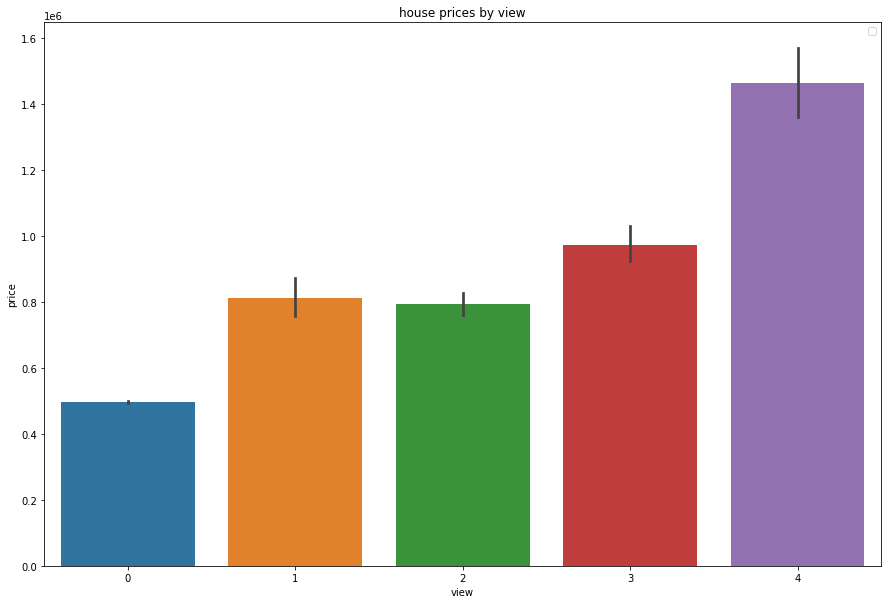

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by view")
plt.xlabel('view')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='view',y='price',data=kc)

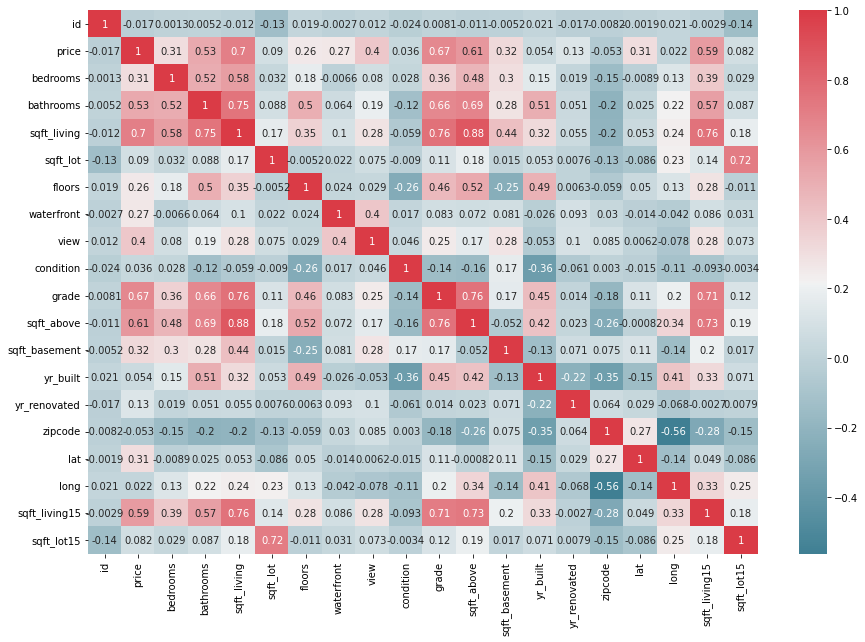

In [ ]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df1.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(kc)

# Interpritation

* D'apres ce dernier , ca nous interesse la correlation entre ''price'' et les autres variables . 
* On oberve 7 correlation qui sont les plus fort avec la colonne ''price'' 
* La meilleur relation c'est entre ''price'' et ''sqft_living'' avec une precession de 70% 

# Most important features
D'apres les graphe qu'on avait vu deja et avec ces interpretations , et aussi la correlation entre nos variables , notre but c'est de predire les prix des maisons , et pour faire ca , on a choisit les meilleurs variables qui sont :
* sqft_living
*bedrooms
*bathrooms
*grade
*view
*waterfront
*sqft_above

In [ ]:
kc['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

Text(0, 0.5, 'price x1000')

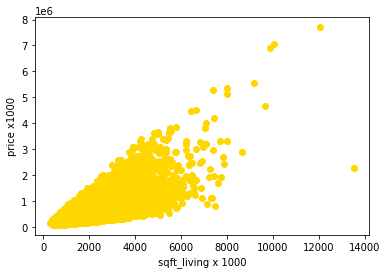

In [ ]:
X = np.array(kc['sqft_living']).reshape(-1,1)
y = np.array(kc['price']).reshape(-1,1)
plt.scatter(X, y, color = 'gold', marker='o')
plt.xlabel('sqft_living x 1000')
plt.ylabel('price x1000')

In [ ]:
# Create/instantiate the linear reg
reg = LinearRegression()

# Train our model
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.26,random_state=40)
reg.fit(x_train,y_train)
# Check the theta/coef
predicted = reg.predict(x_test)
R1 = metrics.r2_score(y_test,predicted)
R1

0.5180679846478083

Text(0, 0.5, 'price x1000')

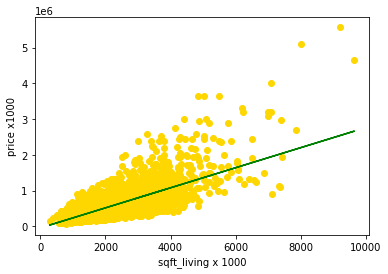

In [ ]:
X = np.array(kc['sqft_living']).reshape(-1,1)
y = np.array(kc['price']).reshape(-1,1)
plt.scatter(x_test, y_test, color = 'gold', marker='o')
plt.plot(x_test, predicted, color = 'green')
plt.xlabel('sqft_living x 1000')
plt.ylabel('price x1000')

# Multiple Linear Regression

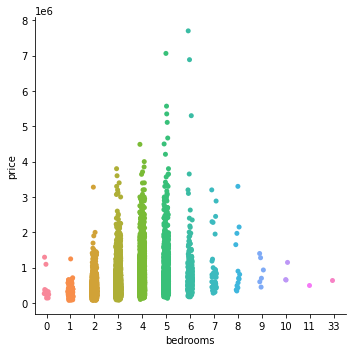

In [ ]:
sns.catplot(x='bedrooms',y='price',data=kc)

Text(0, 0.5, 'price')

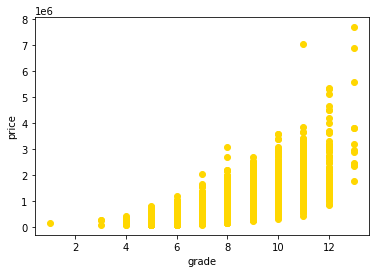

In [ ]:
X = np.array(kc['sqft_living']).reshape(-1,1)
y = np.array(kc['price']).reshape(-1,1)
plt.scatter(kc['grade'], kc['price'], color = 'gold', marker='o')
plt.xlabel('grade')
plt.ylabel('price')

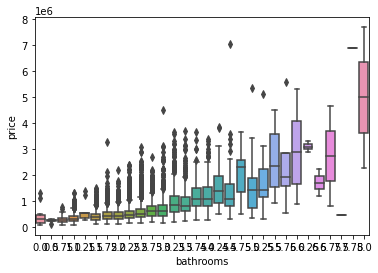

In [ ]:
sns.boxplot(x=kc['bathrooms'],y=kc['price'])

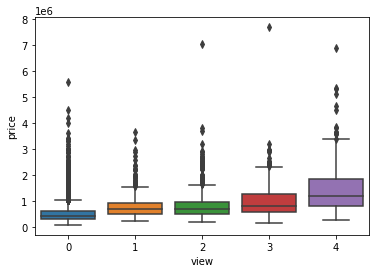

In [ ]:
sns.boxplot(x=kc['view'],y=kc['price'])

In [ ]:
# Create/instantiate the linear reg
f=['bedrooms','view' ,'grade','sqft_living','sqft_above','waterfront','floors','bathrooms','sqft_lot','sqft_basement','lat','sqft_living15']
y = np.array(kc['price']).reshape(-1,1)
X2 = np.array(kc[f])
reg = LinearRegression()
# Train our model
x_train,x_test,y_train,y_test = train_test_split(X2,y,test_size=0.20,random_state=2)
reg.fit(x_train,y_train)
# predict
predicted = reg.predict(x_test)
R2 = metrics.r2_score(y_test,predicted)
R2

0.6754213382054418

R2 > R1

# Regression polynomiale

In [ ]:
X3 = np.array(kc[f])
for k in range(1,5):
  polyfeat=PolynomialFeatures(degree=k)
  x_train,x_test,y_train,y_test = train_test_split(X3,y,test_size=0.20,random_state=3)
  xtrain_poly=polyfeat.fit_transform(x_train)
  xtest_poly=polyfeat.fit_transform(x_test)
  poly = LinearRegression()
  poly.fit(xtrain_poly,y_train)
  polypred=poly.predict(xtest_poly)
  print(metrics.r2_score(y_test,polypred))

0.6718201778711783
0.7591705447704484
0.6646163648824626
-0.0103684177969956


avec deg = 2 

R3 > R2 > R1


0.4970776026456991
0.5410957433505739
0.5453025202460204


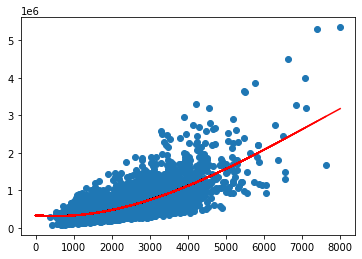

In [ ]:
XX = np.array(kc['sqft_living']).reshape(-1,1)
for k in range(1,4):
  polyfeat=PolynomialFeatures(degree=k)
  x_train,x_test,y_train,y_test = train_test_split(XX,y,test_size=0.26,random_state=3)
  xtrain_poly=polyfeat.fit_transform(x_train)
  xtest_poly=polyfeat.fit_transform(x_test)
  poly = LinearRegression()
  poly.fit(xtrain_poly,y_train)
  polypred=poly.predict(xtest_poly)
  print(metrics.r2_score(y_test,polypred))


X5 = x_test.tolist()
y5 = y_test.tolist()
p5 = polypred.tolist()
p55 = []
X55 = []
y55 = []
for k in p5:
  p55.append(k[0])
for i in X5:
  X55.append(i[0])
for j in y5:
  y55.append(j[0])
mymodel = np.poly1d(np.polyfit(X55, p55, 3))

myline = np.linspace(1, X55)

plt.scatter(x_test, y_test)
plt.plot(myline, mymodel(myline),color = 'red')
plt.show()

0.46108220156131785
0.5225532557464752
0.525807421302956


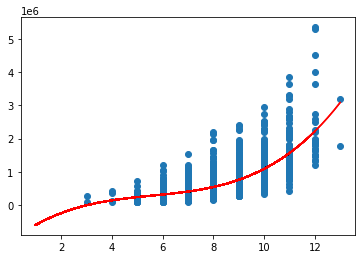

In [ ]:
XX = np.array(kc['grade']).reshape(-1,1)
for k in range(1,4):
  polyfeat=PolynomialFeatures(degree=k)
  x_train,x_test,y_train,y_test = train_test_split(XX,y,test_size=0.26,random_state=3)
  xtrain_poly=polyfeat.fit_transform(x_train)
  xtest_poly=polyfeat.fit_transform(x_test)
  poly = LinearRegression()
  poly.fit(xtrain_poly,y_train)
  polypred=poly.predict(xtest_poly)
  print(metrics.r2_score(y_test,polypred))


X5 = x_test.tolist()
y5 = y_test.tolist()
p5 = polypred.tolist()
p55 = []
X55 = []
y55 = []
for k in p5:
  p55.append(k[0])
for i in X5:
  X55.append(i[0])
for j in y5:
  y55.append(j[0])
mymodel = np.poly1d(np.polyfit(X55, p55, 3))
myline = np.linspace(1, X55)

plt.scatter(x_test, y_test)
plt.plot(myline, mymodel(myline),color = 'red')
plt.show()